In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import torch
from kan import KAN
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('train_normalized.csv')
df_test = pd.read_csv('test_normalized.csv')

X_train = df_train.drop(columns=['satisfaction']).values
y_train = df_train['satisfaction'].values
X_test = df_test.drop(columns=['satisfaction']).values
y_test = df_test['satisfaction'].values

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [4]:
train_input = torch.tensor(X_train, dtype=torch.float32)
train_label = torch.tensor(y_train, dtype=torch.long)
test_input = torch.tensor(X_test, dtype=torch.float32)
test_label = torch.tensor(y_test, dtype=torch.long)

dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

In [10]:
model = KAN(width=[X_train.shape[1], 2], grid=3, k=3)

In [6]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [20]:
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())

train loss: 4.25e-01 | test loss: 4.26e-01 | reg: 2.48e+01 : 100%|██| 20/20 [09:58<00:00, 29.94s/it]


In [21]:
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

Acurácia final no conjunto de teste: 0.9328


Conseguimos nosso primeiro valor para a rede KAN, vamos agora mudar os hiperparametros.

In [22]:
model = KAN(width=[X_train.shape[1], 2], grid=3, k=3)
results = model.fit(dataset, opt="LBFGS", steps=30, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

train loss: 4.24e-01 | test loss: 4.25e-01 | reg: 2.47e+01 : 100%|██| 30/30 [15:27<00:00, 30.93s/it]

Acurácia final no conjunto de teste: 0.9325


Mesmo com mais steps a rede não apresentou nenhuma melhoria, vamos testar variar os valores de grid e de k para observar as alterações, além de voltar para 20 steps.

In [23]:
model = KAN(width=[X_train.shape[1], 2], grid=2, k=2)
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

train loss: 4.43e-01 | test loss: 4.43e-01 | reg: 2.26e+01 : 100%|██| 20/20 [06:10<00:00, 18.54s/it]

Acurácia final no conjunto de teste: 0.9259


Reduzimos a acuracia diminuindo o grid e o k, vamos tentar aumentar separadamente cada um agora.

In [24]:
model = KAN(width=[X_train.shape[1], 2], grid=3, k=4)
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

train loss: 4.28e-01 | test loss: 4.29e-01 | reg: 2.39e+01 : 100%|██| 20/20 [13:42<00:00, 41.11s/it]

Acurácia final no conjunto de teste: 0.9329


Mantivemos o mesmo resultado do primeiro teste, agora vamos tentar adicionar mais uma camada e aumentar a complexidade de k.

In [25]:
model = KAN(width=[X_train.shape[1], 10, 2], grid=3, k=5)
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

train loss: 3.14e-01 | test loss: 3.20e-01 | reg: 1.24e+02 : 100%|█| 20/20 [50:54<00:00, 152.72s/it]

Acurácia final no conjunto de teste: 0.9573


Conseguimos um ótimo resultado, vamos tentar aumentar o número de camadas da rede mais uma vez, o teste vai demorar muito mas esperamos conseguir um bom resultado

In [26]:
model = KAN(width=[X_train.shape[1], 20, 10, 2], grid=3, k=5)
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

train loss: 3.10e-01 | test loss: 3.16e-01 | reg: 1.43e+02 : 100%|█| 20/20 [2:10:01<00:00, 390.08s/i

Acurácia final no conjunto de teste: 0.9581


Conseguimos um valor muito parecido com o teste anterior, então o aumento de complexidade não se pagou, vamos tentar voltar à width antiga mas aumentar o grid dessa vez.

In [27]:
model = KAN(width=[X_train.shape[1], 10, 2], grid=4, k=5)
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

train loss: 3.09e-01 | test loss: 3.17e-01 | reg: 1.14e+02 : 100%|█| 20/20 [52:40<00:00, 158.05s/it]

Acurácia final no conjunto de teste: 0.9578


Conseguimos um bom resultado, talvez aumentar o grid seja uma boa opção, vamos printar os gráficos para esse modelo e qualquer coisa fazemos mais testes.

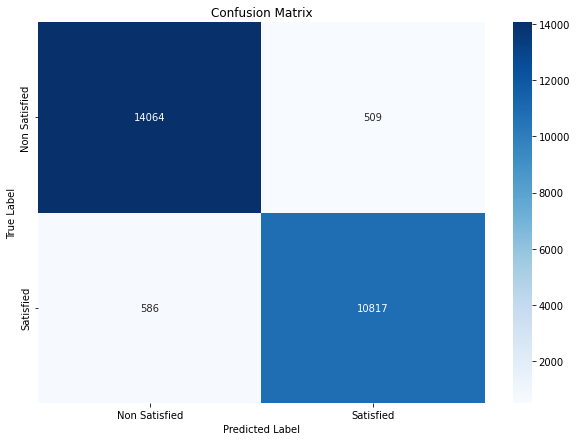

In [29]:
test_outputs = model(dataset['test_input'])
test_predictions = torch.argmax(test_outputs, dim=1).numpy()

conf_matrix = confusion_matrix(y_test, test_predictions)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Satisfied', 'Satisfied'], yticklabels=['Non Satisfied', 'Satisfied'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

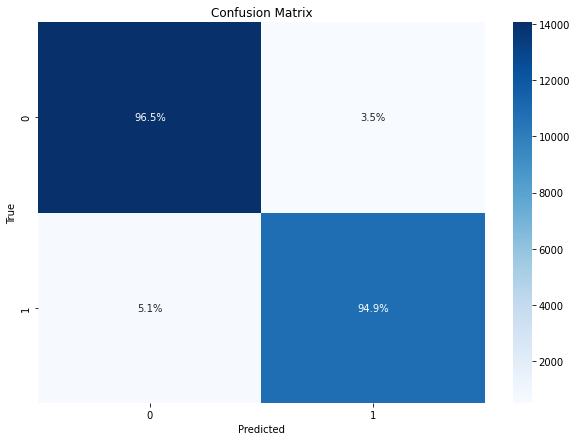

In [30]:
conf_matrix = confusion_matrix(y_test, test_predictions)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

annot_labels = [['{:.1f}%'.format(value) for value in row] for row in conf_matrix_percent]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=annot_labels, fmt='', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

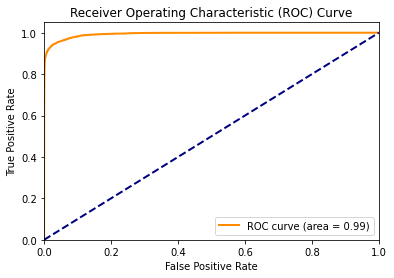

In [31]:
test_probs = torch.softmax(test_outputs, dim=1).detach().numpy()
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

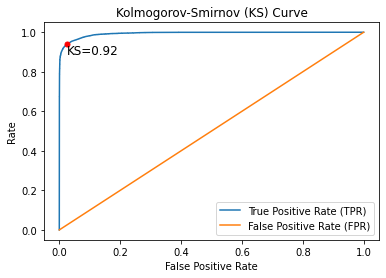

KS Statistic: 0.92


In [32]:
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")

In [7]:
model = KAN(width=[X_train.shape[1], 10, 2], grid=5, k=3)
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

train loss: 3.09e-01 | test loss: 3.16e-01 | reg: 7.25e+01 : 100%|█| 20/20 [36:27<00:00, 109.37s/it]

Acurácia final no conjunto de teste: 0.9573


O resultado foi o mesmo, vamos tentar agora fazer uma rede super complexa e analisar os resultados

In [9]:
model = KAN(width=[X_train.shape[1], 20, 10, 2], grid=5, k=5)
results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
final_test_acc = results['test_acc'][-1]
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

train loss: 2.83e-01 | test loss: 2.99e-01 | reg: 1.41e+02 : 100%|█| 20/20 [2:06:57<00:00, 380.90s/i

Acurácia final no conjunto de teste: 0.9616


Chegamos no melhor resultado com nossos testes.

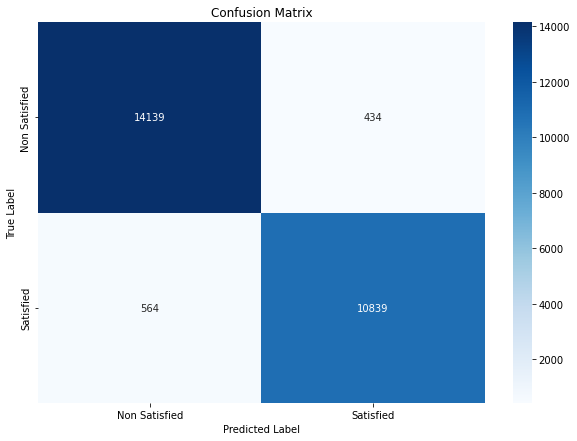

In [10]:
test_outputs = model(dataset['test_input'])
test_predictions = torch.argmax(test_outputs, dim=1).numpy()

conf_matrix = confusion_matrix(y_test, test_predictions)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Satisfied', 'Satisfied'], yticklabels=['Non Satisfied', 'Satisfied'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

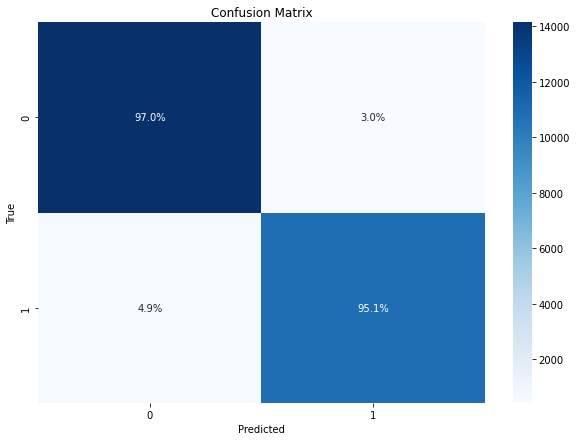

In [11]:
conf_matrix = confusion_matrix(y_test, test_predictions)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

annot_labels = [['{:.1f}%'.format(value) for value in row] for row in conf_matrix_percent]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=annot_labels, fmt='', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

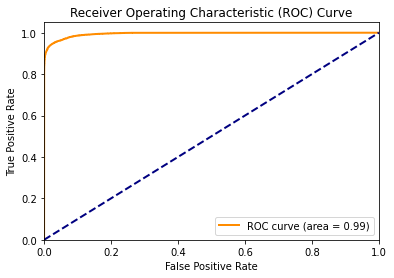

In [12]:
test_probs = torch.softmax(test_outputs, dim=1).detach().numpy()
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

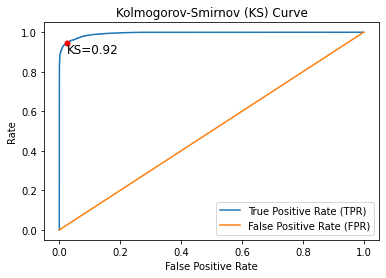

KS Statistic: 0.92


In [13]:
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")